In [2]:
!pip install -q -q -q geopandas

In [7]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from shapely.geometry import Polygon, Point
import scipy.stats as scs
import s3fs

In [5]:
import GWMSA_June2021_optimized as GWMSA

In [8]:
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': 'https://minio.lab.sspcloud.fr'})

In [9]:
fs.get('h529p3/diffusion/batimarseille50km_grid_5m.csv', 'batimarseille50km_grid_5m.csv')

[None]

In [10]:
df = pd.read_csv('batimarseille50km_grid_5m.csv')

In [22]:
df = df[(df.x>886972.94)&(df.x<906074.38)&(df.y>6238082.38)&(df.y<6256171.91) ].copy()

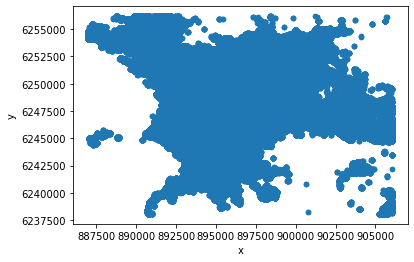

In [23]:
df.plot.scatter(x='x', y='y' )

In [14]:
gdf_50k_bati = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y))

In [15]:
gdf_50k_bati.crs = 'epsg:2154'
gdf_50k_bati.columns

Index(['x', 'y', 'geometry'], dtype='object')

In [16]:
gridsize=50

In [17]:
x = np.arange(gdf_50k_bati['x'].min()+gridsize/2,gdf_50k_bati['x'].max()-gridsize/2,gridsize)
y = np.arange(gdf_50k_bati['y'].min()+gridsize/2,gdf_50k_bati['y'].max()-gridsize/2,gridsize)

In [18]:
X,Y = np.meshgrid(x,y)
mygrid=np.column_stack([X.flatten(),Y.flatten()])

pf_my_grid=pd.DataFrame.from_records(mygrid)
pf_my_grid=pf_my_grid.rename(columns={0:"x", 1:"y"})

In [19]:
# parameters radius 
radius = np.array([ 50., 75., 100., 125., 150., 175., 200., 225., 250., 275., 300., 325., 350., 375., 400.])#650

T=13.*gridsize

data=np.column_stack([gdf_50k_bati.x, gdf_50k_bati.y])


In [20]:
radius = np.array([ 50., 75., 100., 125., 150., 175., 200., 225., 250., 275., 300., 325., 350., 375., 400.])#650

T=13.*gridsize

# Normalized coef
WT, BC, BC_T = GWMSA.localWaveTrans(data, radius, T, glob = 1)
WT_Norm=WT/np.tile(BC_T,(len(radius),1)).transpose()
BC_Norm=BC/np.tile(BC_T,(len(radius),1)).transpose()

# out=[Wratio, Wstd, NWratio, NWstd, Mom, Wlacun]
out = GWMSA.WaveSmoothingOptim(data,WT,X,Y,radius, T, ismom=1, kernel=0, Nanalyse=2**15)
out_Norm = GWMSA.WaveSmoothingOptim(data,WT_Norm,X,Y,radius, T, ismom=1, kernel=0, Nanalyse=2**15)

Non valued data analysis.
bunch 1/83 :  0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
bunch 2/83 :  0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
bunch 3/83 :  0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
bunch 4/83 :  0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
bunch 5/83 :  0 1 2 3 4 5 6 7 8 

KeyboardInterrupt: 

In [1]:
### change